# Deutsch's Problem Simulation:

*Based on the content of the "Introduction to Quantum Computing" by Saint Petersburg University on Coursera (week 3)*

The algorithm to solve the Deutsch's Problem is the first ever quantum algorithm produced (in 1985).

##### Deutsch's Problem:
> Determining if a function f implements a constant or balanced function as below:

$$f:\{0,1\}=\{0,1\}$$

$f$ is a function that maps 1 bit to 1 bit. There are four such functions: 

    Constant f:
     - f(x) = 0
     - f(x) = 1
    
    Balanced f:
     - f(x) = x
     - f(x) = not x

##### Issue:
The complexity of such problem is that the functions are implemented as a **black box**. We cannot see them, they can only be queried.
> In a classical computer, one needs to perform 2 requests, in a quantum computer it can be done in 1

The quantum algorithm that can solve this problem in 1 request is called Deutsch's algorithm. We will implement a **simulation** below:

### Importing Libraries:

In [1]:
import math
import numpy as np

### Declaring starting cubits and potential functions:

In [2]:
argument_cubit = np.array([1,0]) #cubit |0>
value_cubit =  np.array([0,1]) #cubit |1>

list_functions = [lambda x: 0, # constant function 1
                  lambda x: 1, # constant function 2
                  lambda x: 1 if x==1 else 0, # balanced function 1
                  lambda x: 0 if x==1 else 1] # balanced function 2

### Declaring Quantum Gates:

In [3]:
def tensor_dot_2_cubits(cubit_1, cubit_2):
    """
    Returns the tensor product of two cubits
    """
    return np.kron(cubit_1, cubit_2)

def hadamard_gate_1_cubit(cubit):
    """
    Returns a cubit after going through a hadamard gate (for 1 cubit)
    """
    transformation_matrix = np.array(([1,1],
                                      [1,-1]))
    quotient = 1/math.sqrt(2)
    return quotient, np.dot(transformation_matrix,cubit)
        
def hadamard_gate_2_cubits(cubit):
    """
    Returns an entanglement of two cubits after going through a hadamard gate (for 2 cubits)
    """
    transformation_matrix = np.array(([1,1,1,1],
                                      [1,-1,1,-1],
                                      [1,1,-1,-1],
                                      [1,-1,-1,1])) #transformation matrix for 2 cubits
    # see: https://docs.microsoft.com/en-us/quantum/concepts/multiple-qubits
    quotient = (1/math.sqrt(2))**2
    return quotient, np.dot(transformation_matrix,cubit)

def f_gate(function, quotient):
    """
    Because we can factor out the target cubit shown as |-> in the picture below, we can reduce our window of
    interest to the argument cubit 1/2*((-1)**(f(0))*|0> + (-1)**(f(1))*|1>)
    
    This f gate, also called Uf is often called "Quantum Oracle"
    
    Uf = 
    
    """
    cubit_0 = (-1)**function(0)*np.array([1,0])
    cubit_1 = (-1)**function(1)*np.array([0,1])
    return quotient, cubit_0 + cubit_1

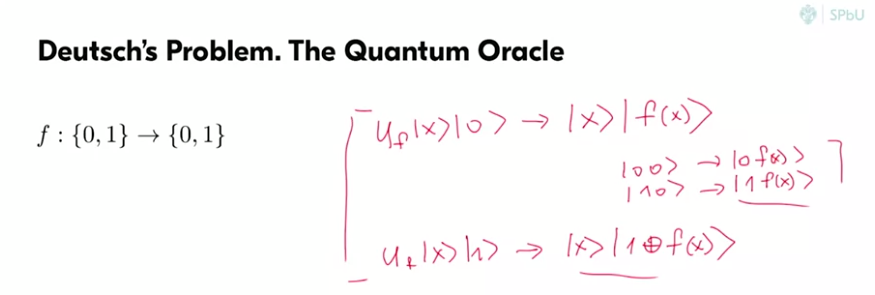

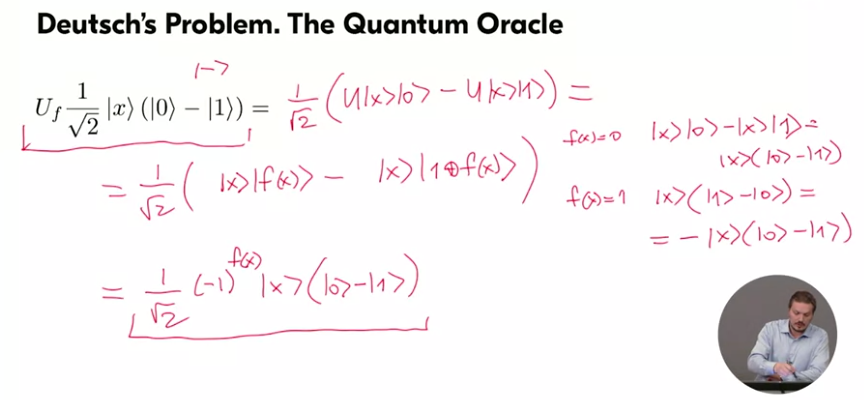

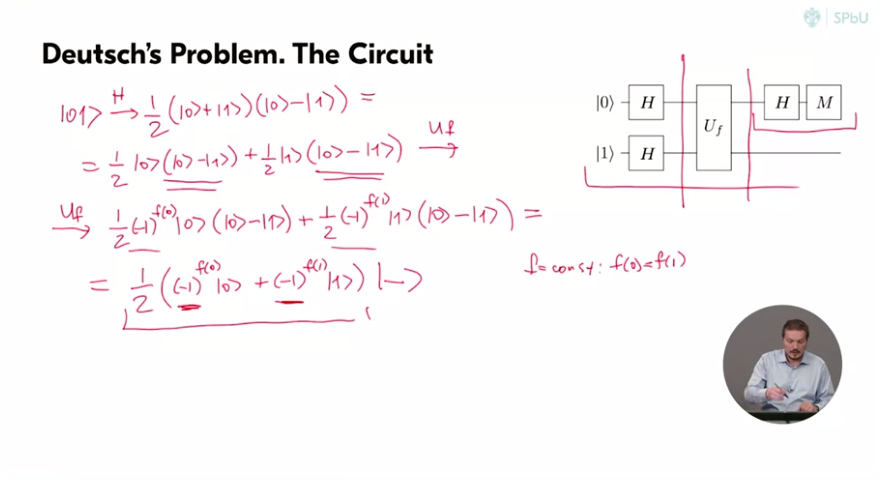

### Implementing the Quantum circuit for each function f

In [4]:
for function in list_functions:
    # creates the tensor product of the argument and value cubits
    input_cubit = tensor_dot_2_cubits(argument_cubit, value_cubit)
    # Applies the hadamard gate to the entangled input cubit
    quotient, H_gate_output = hadamard_gate_2_cubits(input_cubit)
    # Applies the f function gate
    quotient, f_gate_output = f_gate(function, quotient)
    # Applies the hadamard gate to the entangled input cubit
    _, H_gate_output = hadamard_gate_1_cubit(f_gate_output)
    
    if H_gate_output[0] == 0:
        string = "   |1>, i.e. blackbox function F is balanced"
    else:
        string = "   |0>, i.e. blackbox function F is constant"
        
    print("With the old hadamard quotient applied, and new hadamard quotient factored out, we obtain:",
          quotient*H_gate_output, 
          "\nAt the exit of the circuit, the measured argument cubit is:\n",
          string,
          "\n\n")

With the old hadamard quotient applied, and new hadamard quotient factored out, we obtain: [1. 0.] 
At the exit of the circuit, the measured argument cubit is:
    |0>, i.e. blackbox function F is constant 


With the old hadamard quotient applied, and new hadamard quotient factored out, we obtain: [-1.  0.] 
At the exit of the circuit, the measured argument cubit is:
    |0>, i.e. blackbox function F is constant 


With the old hadamard quotient applied, and new hadamard quotient factored out, we obtain: [0. 1.] 
At the exit of the circuit, the measured argument cubit is:
    |1>, i.e. blackbox function F is balanced 


With the old hadamard quotient applied, and new hadamard quotient factored out, we obtain: [ 0. -1.] 
At the exit of the circuit, the measured argument cubit is:
    |1>, i.e. blackbox function F is balanced 


